----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Loading the embeddings
GloVe Embeddings loaded
Saved word embeddings loaded
----------------------------------------------------------------------------------------------------
Model Selected: LSTM based network
----------------------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 50, 300)           17897700  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_______________________

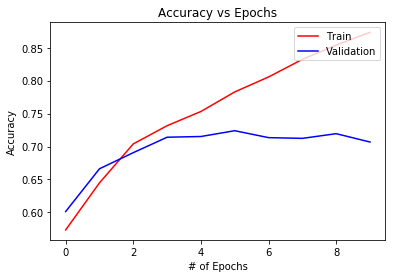

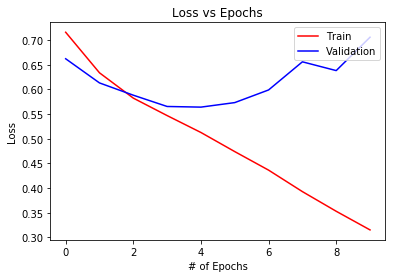

In [4]:
## import nbimporter

import pandas as pd
import argparse
import sklearn
import matplotlib.pyplot as plt
import numpy as np
random_seed = 99

np.random.seed(random_seed)
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Dropout, Activation, Conv1D, Permute, RepeatVector, multiply, Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model, Model
from keras.regularizers import l2
from keras.layers import Dense, Dropout, Input, Lambda
from keras import backend as K
import tensorflow as tf
from dataprep4 import SarcasmDataLoader
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))
from __future__ import print_function, division




class lstm_model:

    def __init__(self, number, hidden_units,dim, vocab_size, max_len, embedding_weights=None):
        self.number = number
        self.hidden_units = hidden_units
        self.dim = dim
        self.vocab_size = vocab_size
        self.max_len = max_len
        self.embedding_weights = embedding_weights

    def loadModel(self):
        input = Input(shape=(self.max_len,))
        embeddings = Embedding(self.vocab_size, self.dim, input_length=self.max_len, weights=[self.embedding_weights], trainable=False)(input)

        
        if self.number == 1:  # LSTM based network
            print('-' * 100)
            print("Model Selected: LSTM based network")
            print('-' * 100)
            lstm_output = LSTM(self.hidden_units)(embeddings)
            lstm_output = Dense(256, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            lstm_output = Dense(128, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            final_output = Dense(1, activation='sigmoid')(lstm_output)

        elif self.number == 2:  # Bidirectional LSTM 
            print('-' * 100)
            print("Model Selected: Bidirectional LSTM ")
            print('-' * 100)
            lstm_output = Bidirectional(LSTM(self.hidden_units))(embeddings)
            lstm_output = Dense(256, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            lstm_output = Dense(128, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            final_output = Dense(1, activation='sigmoid')(lstm_output)

        model = Model(inputs=input, outputs=final_output)
        return model




if __name__ == '__main__':
    # Defining the command line arguments
    epochs = 10
    lr = 1e-03
    batchsize = 32
    number = 1
    
    
    
    # defining the various hyperparameters for the model
    hidden_units = 128  # hidden units for the LSTM
    # the max length of sentence sequence (longer sentences will get truncated
    # to this length)
    max_len = 50

    data_loader_object = SarcasmDataLoader(max_len)
    x_train, y_train, x_test, y_test, vocab_size = data_loader_object.loadData(path='final_clean_reditt.csv')
    print('-' * 100)

    embedding_weights, dim = data_loader_object.loadPreTrainedWordEmbeddings(vocab_size, embedding_path='glove.6B.300d.txt')
    
    sarcasm_model_object = lstm_model(number, hidden_units, dim, vocab_size, max_len,embedding_weights)
    model = sarcasm_model_object.loadModel()

    
    opt = Adam(lr=lr)
    

    #  Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

    print(model.summary())

    # Training the model
    
    plot_data = model.fit(x_train, y_train, epochs=epochs, batch_size=batchsize,verbose=0, shuffle=True, validation_split=0.1)
    # Evaluate the model on test set
    loss, accuracy1 = model.evaluate(x_train, y_train, verbose=0)
    
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print('Accuracy:{}'.format((accuracy+accuracy1) * 50))
    
    
    print("The graphs are displayed")
    # Plotting the graph for accuracy
    plt.plot(plot_data.history['acc'], 'r-')
    plt.plot(plot_data.history['val_acc'], 'b-')
    plt.xlabel('# of Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Epochs")
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # Plotting the graph for loss
    plt.plot(plot_data.history['loss'], 'r-')
    plt.plot(plot_data.history['val_loss'], 'b-')
    plt.xlabel('# of Epochs')
    plt.title("Loss vs Epochs")
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Loading the embeddings
GloVe Embeddings loaded
Saved word embeddings loaded
----------------------------------------------------------------------------------------------------
Model Selected: Bidirectional LSTM 
----------------------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 50, 300)           17897700  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               439296    
______________________

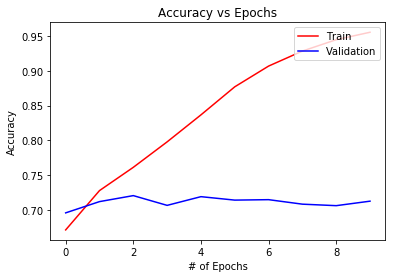

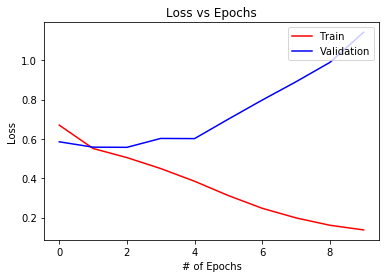

In [6]:
## import nbimporter

import pandas as pd
import argparse
import sklearn
import matplotlib.pyplot as plt
import numpy as np
random_seed = 99

np.random.seed(random_seed)
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Dropout, Activation, Conv1D, Permute, RepeatVector, multiply, Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model, Model
from keras.regularizers import l2
from keras.layers import Dense, Dropout, Input, Lambda
from keras import backend as K
import tensorflow as tf
from dataprep4 import SarcasmDataLoader
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))
from __future__ import print_function, division




class lstm_model:

    def __init__(self, number, hidden_units,dim, vocab_size, max_len, embedding_weights=None):
        self.number = number
        self.hidden_units = hidden_units
        self.dim = dim
        self.vocab_size = vocab_size
        self.max_len = max_len
        self.embedding_weights = embedding_weights

    def loadModel(self):
        input = Input(shape=(self.max_len,))
        embeddings = Embedding(self.vocab_size, self.dim, input_length=self.max_len, weights=[self.embedding_weights], trainable=False)(input)

        
        if self.number == 1:  # LSTM based network
            print('-' * 100)
            print("Model Selected: LSTM based network")
            print('-' * 100)
            lstm_output = LSTM(self.hidden_units)(embeddings)
            lstm_output = Dense(256, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            lstm_output = Dense(128, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            final_output = Dense(1, activation='sigmoid')(lstm_output)

        elif self.number == 2:  # Bidirectional LSTM 
            print('-' * 100)
            print("Model Selected: Bidirectional LSTM ")
            print('-' * 100)
            lstm_output = Bidirectional(LSTM(self.hidden_units))(embeddings)
            lstm_output = Dense(256, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            lstm_output = Dense(128, activation ='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(lstm_output)
            lstm_output = Dropout(0.3)(lstm_output)
            final_output = Dense(1, activation='sigmoid')(lstm_output)

        model = Model(inputs=input, outputs=final_output)
        return model




if __name__ == '__main__':
    # Defining the command line arguments
    epochs = 10
    lr = 1e-03
    batchsize = 32
    number = 2
    
    
    
    # defining the various hyperparameters for the model
    hidden_units = 128  # hidden units for the LSTM
    # the max length of sentence sequence (longer sentences will get truncated
    # to this length)
    max_len = 50

    data_loader_object = SarcasmDataLoader(max_len)
    x_train, y_train, x_test, y_test, vocab_size = data_loader_object.loadData(path='final_clean_reditt.csv')
    print('-' * 100)

    embedding_weights, dim = data_loader_object.loadPreTrainedWordEmbeddings(vocab_size, embedding_path='glove.6B.300d.txt')
    
    sarcasm_model_object = lstm_model(number, hidden_units, dim, vocab_size, max_len,embedding_weights)
    model = sarcasm_model_object.loadModel()

    
    opt = Adam(lr=lr)
    

    #  Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

    print(model.summary())

    # Training the model
    
    plot_data = model.fit(x_train, y_train, epochs=epochs, batch_size=batchsize,verbose=0, shuffle=True, validation_split=0.1)
    # Evaluate the model on test set
    loss, accuracy1 = model.evaluate(x_train, y_train, verbose=0)
    
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print('Accuracy:{}'.format((accuracy+accuracy1) * 50))
    
    
    print("The graphs are displayed")
    # Plotting the graph for accuracy
    plt.plot(plot_data.history['acc'], 'r-')
    plt.plot(plot_data.history['val_acc'], 'b-')
    plt.xlabel('# of Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Epochs")
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # Plotting the graph for loss
    plt.plot(plot_data.history['loss'], 'r-')
    plt.plot(plot_data.history['val_loss'], 'b-')
    plt.xlabel('# of Epochs')
    plt.title("Loss vs Epochs")
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

